1.	В предоставленном датасете проанализировать несколько характеристик и построить набор визуализаций
Датасет имен https://github.com/wesm/pydata-book/tree/2nd-edition/datasets/babynames <br>
●	Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов<br>
●	Найдите самые популярные имена за всю историю<br>
●	Разбейте весь временной промежуток в данных на 10 частей и для каждой найдите самое популярное имя каждого пола. Для каждого найденного имени визуализируйте его динамику за все время<br>
●	Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год)<br>
●	Выберите 4 года из всего промежутка и отобразите для каждого года распределение по первой букве в имени, по последней букве в имени<br>
●	Составьте список из нескольких известных людей (президенты, певцы, актеры, киногерои) и оцените их влияние на динамику имен, постройте наглядную визуализацию<br>

2.	Выбрать датасет и провести его анализ<br>
●	Выбрать данные<br>
●	Составить список вопросов, по которым хотелось бы получить ответ в виде графиков (и расширять этот список вопросов в процессе выполнения задания)<br>
●	Построить соответствующие визуализации<br>


Требования к выполнению задания - сделать не менее 5 визуализаций разного типа с фильтрацией и преобразованием данных разной сложности (5 раз df[‘column_i’].plot() на каждую колонку не принимается). Нужно постараться найти в данных что-то необычное или с помощью визуализаций показать характеристики данных.

Данные на выбор:

1.	Данные, собранные в дз 1 (для выбора этого пункта есть смысл сначала понять, можно ли по данным построить разные визуализации)
2.	Заново собранные данные (для выбора этого пункта есть смысл сначала понять, можно ли по данным построить разные визуализации) (можно кстати попробовать собрать и визуализировать данные по вакансиям Data Science, Big Data в России)
3.	Подобрать датасет самостоятельно. Например отсюда: https://habrahabr.ru/company/mailru/blog/339496/.com 
4.	Взять датасет из kaggle https://www.kaggle.com/datasets, например https://www.kaggle.com/usdot/flight-delays/data, параллельно можно поучаствовать в конкурсе https://www.kaggle.com/about/datasets-awards/kernels (по сути опубликовать свое выполненное дз, обратите внимание, что в конкурсе участвует только один датасет). При выполнении этого пункта можно и нужно подглядывать в уже опубликованные kernels, но надо понимать, что нельзя копировать из них код - нужно отработать навыки написания кода. И лучше сначала сделать по-максимуму анализ и визуализации, потом подсмотреть идеи, такая работа будет самой эффективной.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas.io.json import json_normalize

In [2]:
sum_=[]
for year in range(1880, 2011):
    each_year=pd.read_csv(f'babynames/yob{year}.txt',names=['name','sex','number'])
    each_year['year']=year
    sum_.append(each_year)
    
df = pd.concat(sum_).reset_index(drop=True)

In [3]:
df.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


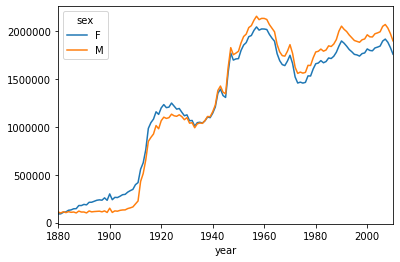

In [4]:
df1=df.groupby(['sex','year']).sum()[['number']].reset_index()
df1=df1.pivot(index='year', columns='sex', values='number')
df1.plot()
plt.show()

In [5]:
df[df['sex']=='F']['name'].value_counts().idxmax()

'Olivia'

In [6]:
df[df['sex']=='M']['name'].value_counts().idxmax()

'Abraham'

In [7]:
bins = list(range(1880, 2011, 13))
bins[0]=1879
df['binned']=pd.cut(df['year'], bins)
df.head()

,name,sex,number,year,binned
0,Mary,F,7065,1880,"(1879, 1893]"
1,Anna,F,2604,1880,"(1879, 1893]"
2,Emma,F,2003,1880,"(1879, 1893]"
3,Elizabeth,F,1939,1880,"(1879, 1893]"
4,Minnie,F,1746,1880,"(1879, 1893]"


In [8]:
df2=df.groupby(['binned','sex','name'])[['number']].sum().unstack(level=0).unstack(level=0)
df2.head()

number                                                         \
binned    (1879, 1893]     (1893, 1906]     (1906, 1919]     (1919, 1932]       
sex                  F   M            F   M            F   M            F   M   
name                                                                            
Aaban              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aabid              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aabriella          NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aadam              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aadan              NaN NaN          NaN NaN          NaN NaN          NaN NaN   

                                                                               \
binned    (1932, 1945]     (1945, 1958]     (1958, 1971]     (1971, 1984]       
sex                  F   M            F   M            F   M            F   M   
name                                                                            
Aaban              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aabid              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aabriella          NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aadam              NaN NaN          NaN NaN          NaN NaN          NaN NaN   
Aadan              NaN NaN          NaN NaN          NaN NaN          NaN NaN   

                                                 
binned    (1984, 1997]       (1997, 2010]        
sex                  F     M            F     M  
name                                             
Aaban              NaN   NaN          NaN  20.0  
Aabid              NaN   NaN          NaN   5.0  
Aabriella          NaN   NaN          5.0   NaN  
Aadam              NaN  39.0          NaN  94.0  
Aadan              NaN   NaN          NaN  69.0

In [9]:
names=[]
for i in range(0,10):
    names.append(df2.iloc[:,i].idxmax())

names=list(set(names))
names

['John', 'Robert', 'James', 'Mary']

In [10]:
df3=df.groupby(['year','name'])[['number']].sum().unstack(level=0)
df3.fillna(0,inplace=True)
df3=df3['number']
df3.head()

year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
name,,,,,,,,,,,,,,,,,,,,,
Aaban,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,6.0,9.0
Aabid,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aabriella,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
Aadam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,11.0,10.0,9.0,6.0,9.0,8.0,6.0,9.0,7.0
Aadan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,8.0,22.0,23.0,11.0


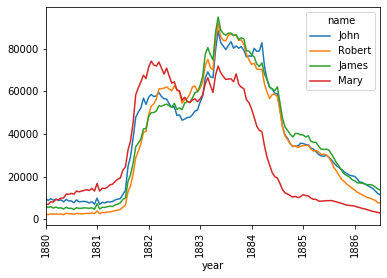

In [11]:
ax=df3.loc[names,:].T.plot().set_xticklabels(range(1880,2011), rotation=90)
plt.show()

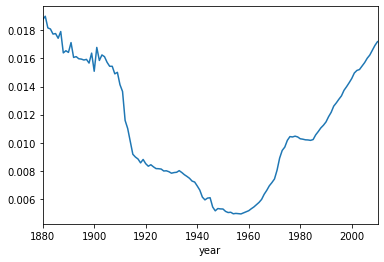

In [14]:
(df3.astype(bool).sum()/(df3.sum()/2)).plot()

In [15]:
df4=df3.copy()
df4['firstL']=df4.index.get_level_values(0).str[0]
df4['lastL']=df4.index.get_level_values(0).str[-1]
df_fl=df4.iloc[:,[5,35,85,110,-2,-1]].groupby(['firstL']).sum()
df_ll=df4.iloc[:,[5,35,85,110,-2,-1]].groupby(['lastL']).sum()

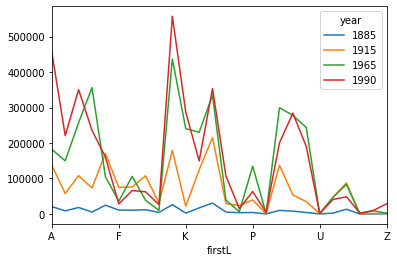

In [16]:
df_fl.plot()

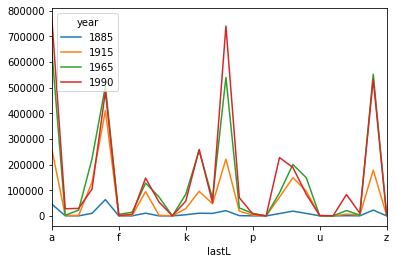

In [17]:
df_ll.plot()

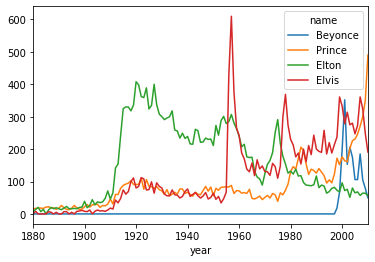

In [18]:
fnames= ['Beyonce','Prince','Elton','Elvis']
df3.loc[fnames,:].T.plot()
plt.show()

Все четыре графика имеют пики в определенных временных участках:<br>
Beyonce - Певица начала карьеру в 90-х.<br>
Prince - Певец дебютировал в 70-х и в 80-х выпустил один из своих самых больших хитов.<br>
Elvis - Певец начал карьеру в 50-х и после этого его популярность не спадала.<br>
Elton - Дебютный альбом певца вышел в 1973 году.<br>

**Посмотрим на статистику просмотров на Youtube**<br>
(https://www.kaggle.com/datasnaek/youtube-new)

In [19]:
data=pd.read_csv('USvideos.csv')
data.tags=data.tags.apply(lambda x: x.replace('"','').split('|'))
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,[SHANtell martin],748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"[last week tonight trump presidency, last week...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"[rhett and link, gmm, good mythical morning, r...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [21]:
taglist=pd.Series([x for sl in data.tags.tolist() for x in sl])
taglist.value_counts()[800:]

Celeb Gossip            108
Comedians               108
eating                  108
Kourtney Kardashian     108
marriage                108
                       ... 
Ska                       1
Audyssie James            1
Musica Sin Fronteras      1
60                        1
timmy                     1
Length: 55893, dtype: int64

1) Распеределение даты публикации видео по месяцам/годам. <br>
2) Как быстро видео начинают вируситься? <br>
3) С чем коррелирует количество просмотров? <br>
4) Есть ли различия в количестве просмотров в разных категориях? <br>
5) Распределение просмотров/лайков/дизлайков для разных тэгов. <br>

In [22]:
data['pub_m']=data.publish_time.apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z').month)

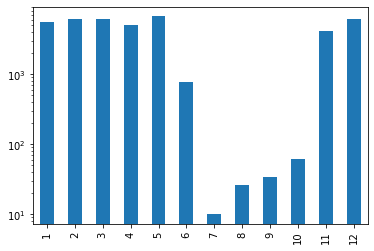

In [23]:
data['pub_m'].value_counts().sort_index().plot(kind='bar').set_yscale('log')
plt.show()

Летом и осенью гораздо реже выкладывают видео.

In [24]:
data['pub_y']=data.publish_time.apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z').year)

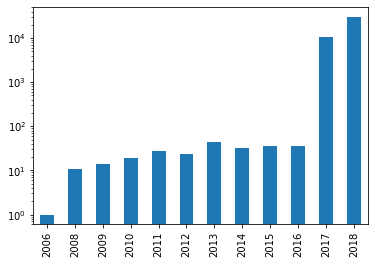

In [25]:
data['pub_y'].value_counts().sort_index().plot(kind='bar').set_yscale('log')
plt.show()

За последние два года количество данных/видео увеличилось.

In [26]:
data['trend_time']=(data.trending_date.apply(lambda x: datetime.strptime(x,'%y.%d.%m'))\
                    -data.publish_time.apply(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.000Z')))
data['trend_time']=data['trend_time'].apply(lambda x: x.days)

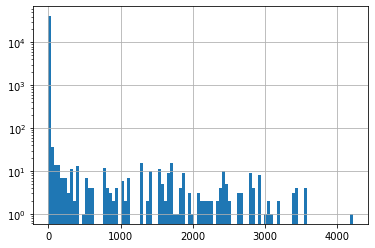

In [27]:
data['trend_time'].hist(bins=100).set_yscale('log')
plt.show()

In [28]:
data[data['trend_time']>7]['trend_time'].count()/len(data)

0.2542430828591663

В основном, популярными становятся видео за первые несколько дней. Через неделю вирусятся только 25% от видео.

Расшифруем категории.

In [29]:
cat=pd.read_json('US_category_id.json')
cats=json_normalize(cat['items'])
cats=cats[['id','snippet.title']]
cats.columns=['category_id','category_name']
cats['category_id']=cats['category_id'].astype(int)
cats.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [30]:
data_=data.merge(cats,on='category_id',how='left')
cols=['channel_title', 'title', 'publish_time','trending_date', 'trend_time', 'category_id', 'category_name', 'tags',
      'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
      'video_error_or_removed']
data1=data_[cols]

In [31]:
data1['likes_rate1']=data1['likes']/data1['dislikes']
data1['likes_rate2']=data1['likes']/data1['views']
data1['likes_rate3']=data1['comment_count']/data1['views']
data1['likes_rate4']=data1['likes']+data1['dislikes']+data1['comment_count']
data1.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,channel_title,title,publish_time,trending_date,trend_time,category_id,category_name,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,likes_rate1,likes_rate2,likes_rate3,likes_rate4
0,CaseyNeistat,WE WANT TO TALK ABOUT OUR MARRIAGE,2017-11-13T17:13:01.000Z,17.14.11,0,22,People & Blogs,[SHANtell martin],748374,57527,2966,15954,False,False,False,19.395482,0.076869,0.021318,76447
1,LastWeekTonight,The Trump Presidency: Last Week Tonight with J...,2017-11-13T07:30:00.000Z,17.14.11,0,24,Entertainment,"[last week tonight trump presidency, last week...",2418783,97185,6146,12703,False,False,False,15.812724,0.040179,0.005252,116034
2,Rudy Mancuso,"Racist Superman | Rudy Mancuso, King Bach & Le...",2017-11-12T19:05:24.000Z,17.14.11,1,23,Comedy,"[racist superman, rudy, mancuso, king, bach, r...",3191434,146033,5339,8181,False,False,False,27.352126,0.045758,0.002563,159553
3,Good Mythical Morning,Nickelback Lyrics: Real or Fake?,2017-11-13T11:00:04.000Z,17.14.11,0,24,Entertainment,"[rhett and link, gmm, good mythical morning, r...",343168,10172,666,2146,False,False,False,15.273273,0.029641,0.006253,12984
4,nigahiga,I Dare You: GOING BALD!?,2017-11-12T18:01:41.000Z,17.14.11,1,24,Entertainment,"[ryan, higa, higatv, nigahiga, i dare you, idy...",2095731,132235,1989,17518,False,False,False,66.483157,0.063097,0.008359,151742


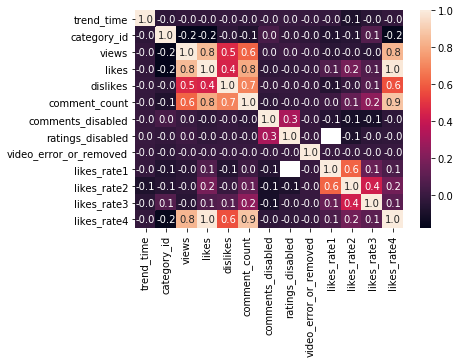

In [32]:
sns.heatmap(data1.corr(),annot=True, fmt='.1f')
plt.show()

Очевидно, что количество просмотров коррелирует с лайками, количеством комментариев и... дизлайками.

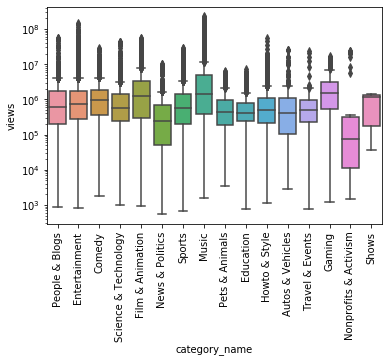

In [33]:
ax=sns.boxplot(x='category_name', y='views', data=data1)
ax.set_yscale('log')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Меньше всего просмотров получают видео из категории Nonprofits & Activism. Больше всего - видео из категории музыка.

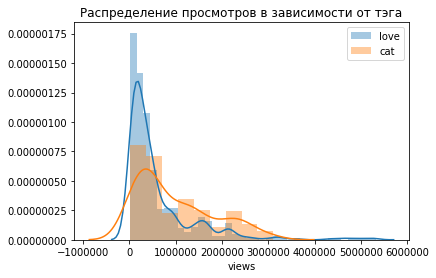

In [34]:
sns.distplot(data1[['love' in x for x in data1['tags']]&(data1['views']<6000000)]['views'])
sns.distplot(data1[['cat' in x for x in data1['tags']]&(data1['views']<6000000)]['views'])
plt.title('Распределение просмотров в зависимости от тэга')
plt.legend(['love','cat'])
plt.show()

У видео с котиками обычно больше просмотров, чем у видео с тэгом "love".